<a href="https://colab.research.google.com/github/Mokaba23/Data-science-portfolio/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [6]:
df = pd.read_csv('/content/sample_data/MY2022 Fuel Consumption Ratings.csv')

In [7]:
df.head(10)

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7
5,2022,Acura,TLX SH-AWD A-SPEC,Compact,2.0,4,AS10,Z,11.3,8.1,9.8,29,231,5,7
6,2022,Acura,TLX Type S,Compact,3.0,6,AS10,Z,12.3,9.4,11.0,26,256,5,5
7,2022,Acura,TLX Type S (Performance Tire),Compact,3.0,6,AS10,Z,12.3,9.8,11.2,25,261,4,5
8,2022,Alfa Romeo,Giulia,Mid-size,2.0,4,A8,Z,10.0,7.2,8.7,32,205,6,3
9,2022,Alfa Romeo,Giulia AWD,Mid-size,2.0,4,A8,Z,10.5,7.7,9.2,31,217,5,3


In [8]:
#finding the statistic for the dataset
df.describe()

,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
count,946.0,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,2022.0,3.198732,5.668076,12.506448,9.363319,11.092072,27.247357,259.172304,4.539112,4.950317
std,0.0,1.374814,1.932670,3.452043,2.285125,2.876276,7.685217,64.443149,1.471799,1.679842
min,2022.0,1.200000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000,1.000000,1.000000
25%,2022.0,2.000000,4.000000,10.200000,7.700000,9.100000,22.000000,213.250000,3.000000,3.000000
50%,2022.0,3.000000,6.000000,12.200000,9.200000,10.800000,26.000000,257.000000,5.000000,5.000000
75%,2022.0,3.800000,6.000000,14.700000,10.700000,12.900000,31.000000,300.750000,5.000000,6.000000
max,2022.0,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000,10.000000,7.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         946 non-null    int64  
 1   Make                               946 non-null    object 
 2   Model                              946 non-null    object 
 3   Vehicle Class                      946 non-null    object 
 4   Engine Size(L)                     946 non-null    float64
 5   Cylinders                          946 non-null    int64  
 6   Transmission                       946 non-null    object 
 7   Fuel Type                          946 non-null    object 
 8   Fuel Consumption (City (L/100 km)  946 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 11  Fuel Consumption(Comb (mpg))       946 non-null    int64  

In [10]:
df.columns

Index(['Model Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size(L)',
       'Cylinders', 'Transmission', 'Fuel Type',
       'Fuel Consumption (City (L/100 km)', 'Fuel Consumption(Hwy (L/100 km))',
       'Fuel Consumption(Comb (L/100 km))', 'Fuel Consumption(Comb (mpg))',
       'CO2 Emissions(g/km)', 'CO2 Rating', 'Smog Rating'],
      dtype='object')

In [11]:
#Let's select some features to explore more.

cdf = df[['Engine Size(L)','Cylinders','Fuel Consumption(Comb (mpg))','CO2 Emissions(g/km)']]
cdf.head(10)

,Engine Size(L),Cylinders,Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km)
0,2.4,4,33,200
1,3.5,6,25,263
2,2.0,4,29,232
3,2.0,4,27,242
4,2.0,4,29,230
5,2.0,4,29,231
6,3.0,6,26,256
7,3.0,6,25,261
8,2.0,4,32,205
9,2.0,4,31,217


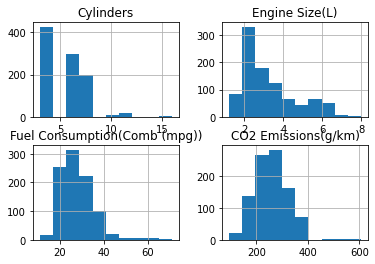

In [12]:
#We can plot each of these features:

viz = cdf[['Cylinders','Engine Size(L)','Fuel Consumption(Comb (mpg))','CO2 Emissions(g/km)']]
viz.hist()
plt.show()

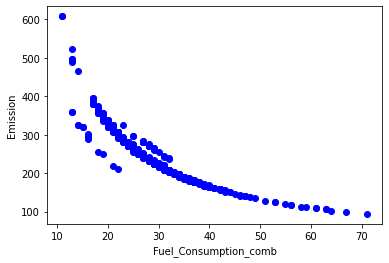

In [13]:
plt.scatter(cdf['Fuel Consumption(Comb (mpg))'], cdf['CO2 Emissions(g/km)'], color= 'blue')
plt.xlabel('Fuel_Consumption_comb')
plt.ylabel('Emission')
plt.show()

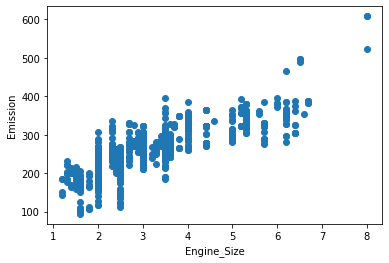

In [14]:
plt.scatter(cdf['Engine Size(L)'],cdf['CO2 Emissions(g/km)'])
plt.xlabel('Engine_Size')
plt.ylabel('Emission')
plt.show()

CYLINDER vs the Emission, to see how linear is their relationship is:



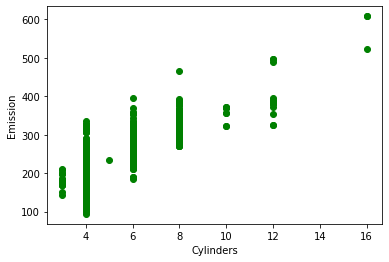

In [15]:
plt.scatter(cdf['Cylinders'],cdf['CO2 Emissions(g/km)'],color='green')
plt.xlabel('Cylinders')
plt.ylabel('Emission')
plt.show()

**Creating train and test dataset**

Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, you train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.


This means that we know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.


Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using np.random.rand() function:



In [16]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk] #negation (was not in the msk dataset)


**Simple Regression Model**

Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation.

Train data distribution


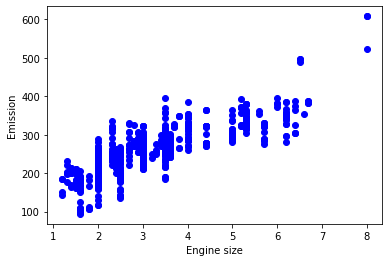

In [17]:
#Train data distribution

plt.scatter(train['Engine Size(L)'],train['CO2 Emissions(g/km)'], color= 'blue')
plt.xlabel('Engine size')
plt.ylabel('Emission')
plt.show()

In [18]:
#Modeling
#Using sklearn package to model data.

from sklearn.linear_model import LinearRegression

regg = LinearRegression()
train_x = np.asanyarray(train[['Engine Size(L)']])
train_y = np.asanyarray(train[['CO2 Emissions(g/km)']])
regg.fit(train_x, train_y)



LinearRegression()

In [19]:
print('Coefficient:',regg.coef_)
print('Intercept:', regg.intercept_)

Coefficient: [[38.57663426]]
Intercept: [135.84673657]


**Plot outputs**

We can plot the fit line over the data:



Text(0, 0.5, 'Emission')

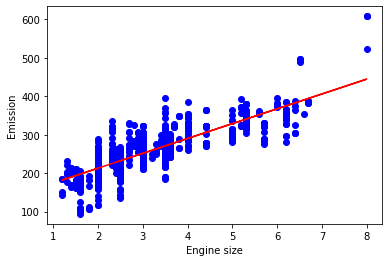

In [20]:
plt.scatter(train['Engine Size(L)'],train['CO2 Emissions(g/km)'], color = 'blue')
plt.plot(train_x, regg.coef_[0][0]*train_x + regg.intercept_[0],'-r')
plt.xlabel('Engine size')
plt.ylabel('Emission')


**Evaluation**

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

Root Mean Squared Error (RMSE).

R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).



In [23]:
from sklearn.metrics import r2_score

regg = LinearRegression()
test_x = np.asanyarray(test[['Engine Size(L)']])
test_y = np.asanyarray(test[['CO2 Emissions(g/km)']])
regg.fit(test_x,test_y)
test_y_ = regg.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )


Mean absolute error: 27.54
Residual sum of squares (MSE): 1303.05
R2-score: 0.66


In [24]:
train_x = train[['Fuel Consumption(Comb (mpg))']]
test_x = test[['Fuel Consumption(Comb (mpg))']]



Now train a Logistic Regression Model using the train_x you created and the train_y created previously

